<a href="https://colab.research.google.com/github/FishPain/sure-bo/blob/leena/LEENA_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

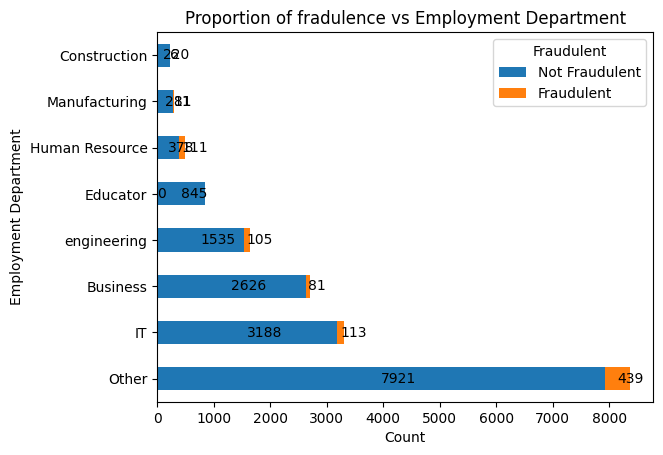

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re

df = pd.read_csv('scam_dataset1.csv',encoding='ISO-8859-1')

#define category mapping for job titles
category_mapping ={
      'Business': ['business', 'sales' , 'marketing' , 'accounting' , 'finance'],
     'Human Resource':['admin' , 'adminstrative'],
     'Educator':['teach' , 'training' ,'lecture'],
     'Manufacturing':['process control' ,'quality assurance' , 'maintenance' ,'manufacturing' , 'purchasing'],
     'Construction':['real estate' , 'housing' ,'constructions' , 'architect' ,'interior design'],
    'engineering': ['engineer' , 'mechanical' , 'electrical' , 'civil'],
    'IT': ['IT' , 'information technology' ,'developer','programmer']
}

#function to categorise job titles based on keywords
def categorise_job_title(title, category_mapping=category_mapping):
  for category, keywords in category_mapping.items():
    for keyword in keywords:
      if str(keyword).lower() in str(title).lower():
        return category
  return 'Other'
# Apply the categorisation function to the 'title' column and create a new 'Category' column
df['Category'] = df['title'].apply(lambda x: categorise_job_title(x, category_mapping))

# Calculate the counts for each category
fraud_counts = df.groupby(['Category','fraudulent']).size().unstack().fillna(0)

# Calculate total counts for each category
total_counts = fraud_counts.sum(axis=1)

# Sort categories based on total counts in descending order
sorted_categories = total_counts.sort_values(ascending=False).index

# Sort the fraud counts based on sorted categories
fraud_counts_sorted = fraud_counts.loc[sorted_categories]

# Create a horizontal stacked bar graph for the fraud counts
ax = fraud_counts_sorted.plot(kind='barh', stacked=True)

# Add labels and title to the plot
plt.xlabel('Count')
plt.ylabel('Employment Department')
plt.title('Proportion of fradulence vs Employment Department')

# Annotate the bars with the count values
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(width)}', (x + width /  2 , y + height / 2), ha='left', va='center', color='black')

# Add legend to the plot
plt.legend(title='Fraudulent', labels=['Not Fraudulent', 'Fraudulent'])

plt.show()

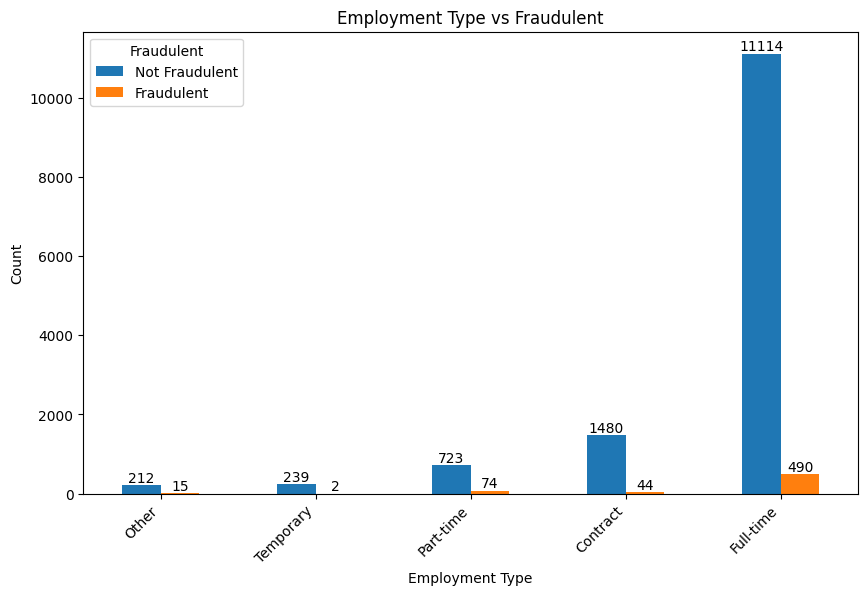

In [ ]:


# Group by 'employment_type' and 'fraudulent', then count occurrences
stacked_data = df.groupby(['employment_type', 'fraudulent']).size().unstack().fillna(0)

# Calculate the total counts for each category
total_counts = stacked_data.sum(axis=1)

# Sort the data based on the total counts in ascending order
sorted_data = stacked_data.loc[total_counts.sort_values().index]

# Create a clustered bar graph
ax = sorted_data.plot(kind='bar', figsize=(10, 6))

# Customize labels and title
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Employment Type vs Fraudulent')

# Display the legend
plt.legend(title='Fraudulent', labels=['Not Fraudulent', 'Fraudulent'])

# Add values on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width / 2, y + height), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import re

category_mapping ={
      'Business': ['business', 'sales' , 'marketing' , 'accounting' , 'finance'],
     'Human Resource':['admin' , 'adminstrative'],

     'Educator':['teach' , 'training' ,'lecture'],
     'Manufacturing':['process control' ,'quality assurance' , 'maintenance' ,'manufacturing' , 'purchasing'],
     'Construction':['real estate' , 'housing' ,'constructions' , 'architect' ,'interior design'],
    'engineering': ['engineer' , 'mechanical' , 'electrical' , 'civil'],
    'IT': ['IT' , 'information technology' ,'developer','programmer']
}

def categorise_job_title(title, category_mapping=category_mapping):
  for category, keywords in category_mapping.items():
    for keyword in keywords:
      if str(keyword).lower() in str(title).lower():
        return category
  return 'Other'

# Apply the categorization function to the job titles and create a new 'Category' column
df['Category'] = df['title'].apply(lambda x: categorise_job_title(x, category_mapping))

print(df.columns)

def preprocess_and_filter(text):
    # Remove common stopwords
    stopwords = set(STOPWORDS)
    words = text.lower().split()
    filtered_words = [word for word in words if len(word) > 1 and word not in stopwords]
    return ' '.join(filtered_words)

# Assuming you have read the CSV file into a DataFrame
df = pd.read_csv('scam_dataset1.csv', encoding='ISO-8859-1')

# Preprocess and filter the 'Other' category job descriptions
other_descriptions = df[df['Category'] == 'Other']['description'].astype(str)
filtered_other_text = preprocess_and_filter(' '.join(other_descriptions))

# Generate the word cloud
wordcloud_other_filtered = WordCloud(width=800, height=400, background_color='white').generate(filtered_other_text)

# Display the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_other_filtered, interpolation='bilinear')
plt.title('Filtered Other Job Descriptions')
plt.axis('off')
plt.show()


Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'in_balanced_dataset', 'Category'],
      dtype='object')


In [ ]:
import pandas as pd
from collections import Counter

df = pd.read_csv('scam_dataset1.csv',encoding='ISO-8859-1')

text = ' '.join(df['description'].astype(str))

# Tokenize the text into words
words = text.lower().split()

# Calculate word frequencies
word_frequencies = Counter(words)

# Identify the most common words (you can adjust the count as needed)
common_words = word_frequencies.most_common(20)  # Change 20 to a suitable number

# Extract the words as custom stopwords
custom_stopwords = {word for word, _ in common_words}

print("Custom Stopwords:", custom_stopwords)


Custom Stopwords: {'for', 'be', 'with', 'the', 'of', 'on', 'will', 'in', 'a', 'you', 'and', 'we', 'an', 'are', 'to', 'that', 'our', 'as', 'is', 'team'}


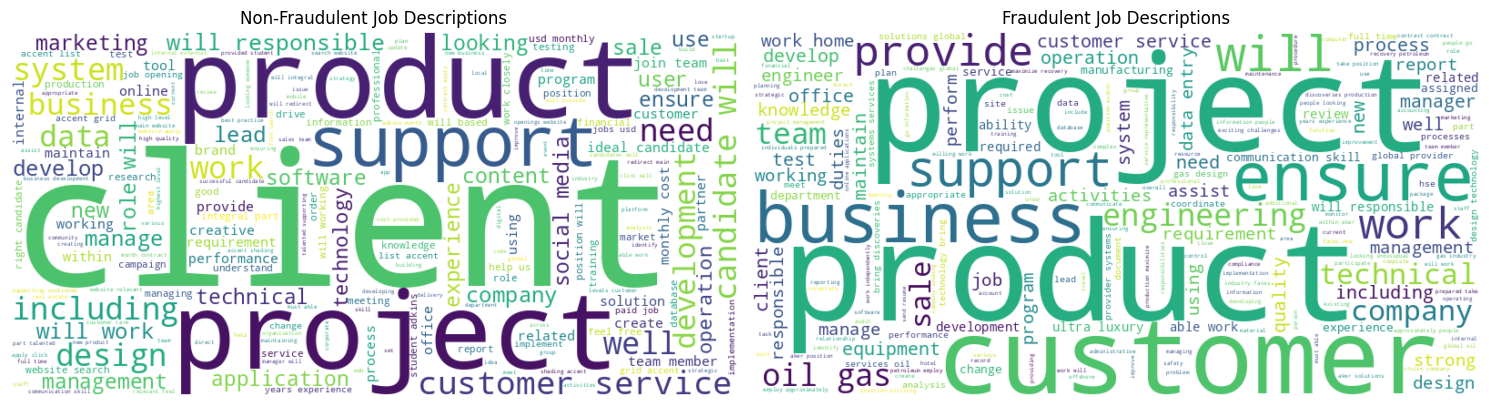

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

# Create a set of custom stopwords for word cloud generation
custom_stopwords = set(STOPWORDS)

# Function to preprocess and filter text
def preprocess_and_filter(text,custom_stopwords):
    words = text.lower().split()

     # Filter out words based on length, custom stopwords, and regex pattern
    filtered_words = [word for word in words if len(word) > 1
                      and word not in custom_stopwords and re.match("^[a-zA-Z]+$", word)]
    return ' '.join(filtered_words)

# Preprocess and filter non-fraudulent and fraudulent texts
filtered_non_fraudulent_text = preprocess_and_filter(non_fraudulent_text,custom_stopwords)
filtered_fraudulent_text = preprocess_and_filter(fraudulent_text,custom_stopwords)

# Generate word clouds for non-fraudulent and fraudulent texts
wordcloud_filtered_non_fraudulent = WordCloud(width=800, height=400, background_color='white',stopwords=custom_stopwords).generate(filtered_non_fraudulent_text)
wordcloud_filtered_fraudulent = WordCloud(width=800, height=400, background_color='white',stopwords=custom_stopwords).generate(filtered_fraudulent_text)

# Plot the word cloud for non-fraudulent job descriptions
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_filtered_non_fraudulent, interpolation='bilinear')
plt.title('Non-Fraudulent Job Descriptions')
plt.axis('off')

# Plot the word cloud for fraudulent job descriptions
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_filtered_fraudulent, interpolation='bilinear')
plt.title('Fraudulent Job Descriptions')
plt.axis('off')

plt.tight_layout()
plt.show()


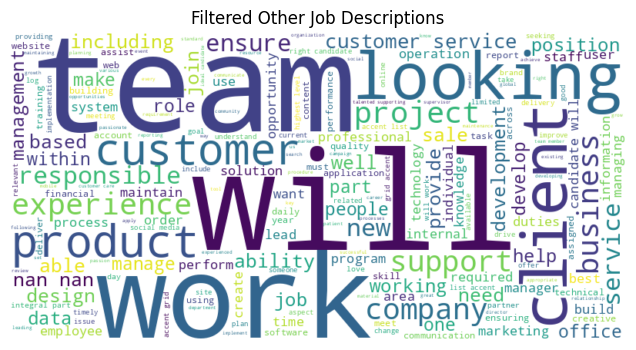

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

# Function to preprocess and filter text
def preprocess_and_filter(text):
    # Split the text into words
    words = text.lower().split()
    # Exclude single letters and non-English words
    filtered_words = [word for word in words if len(word) > 1 and re.match("^[a-zA-Z]+$", word)]
    # Join the filtered words
    return ' '.join(filtered_words)

# Assuming you have df and other_text from the previous code

# Extract job descriptions for the 'Other' category
other_descriptions = df[df['Category'] == 'Other']['description'].astype(str)
other_text = ' '.join(other_descriptions)

# Preprocess and filter the text
filtered_other_text = preprocess_and_filter(other_text)

# Generate the word cloud for the 'Other' category with filtered words
wordcloud_other_filtered = WordCloud(width=800, height=400, background_color='white').generate(filtered_other_text)

# Display the word cloud for the 'Other' category with filtered words
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_other_filtered, interpolation='bilinear')
plt.title('Filtered Other Job Descriptions')
plt.axis('off')
plt.show()



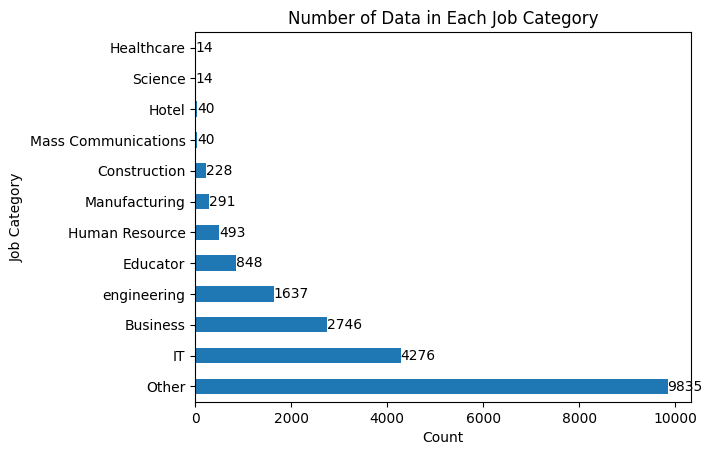

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

category_counts = df['Category'].value_counts()

# Plotting the counts
category_counts.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Job Category')
plt.title('Number of Data in Each Job Category')
for i, count in enumerate(category_counts):
    plt.text(count, i, str(count), ha='left', va='center')
plt.show()

In [ ]:
df['Category'].value_counts()

Other                  9835
IT                     4276
Business               2746
engineering            1637
Educator                848
Human Resource          493
Manufacturing           291
Construction            228
Mass Communications      40
Hotel                    40
Science                  14
Healthcare               14
Name: Category, dtype: int64

In [16]:
df = pd.read_csv('scam_dataset1.csv',encoding='ISO-8859-1')

In [17]:
category_mapping ={
     'Business': ['business'and 'sales' and 'marketing' and 'accounting' and 'finance'],
     'Human Resource':['admin' and 'adminstrative'],
     'Mass Communications': ['advertising' and 'entertainment' and 'public relations' and 'arts' and 'creative design'],
     'Hotel': ['tourism' and 'hotel'],
     'Educator':['teach' and 'training' and 'lecture'],
     'Manufacturing':['process control' and 'quality assurance' and 'maintenance' and 'manufacturing' and 'purchasing'],
     'Construction':['real estate' and 'housing' and 'constructions' and 'architect' and 'interior design'],
     'Healthcare': ['pharmacy' and 'practitioner' and 'diagnosis'],
     "Science": ['agriculture' and "food technology" and 'biology' and 'chemistry' and 'physics' and 'biomedical' and 'science' and 'biotechnology' and 'geology'],
    'engineering': ['engineer' and 'mechanical' and 'electrical' and 'civil'],
    'IT': ['IT' and 'information technology' and 'developer'and 'programmer']
}
def categorise_job_title(title, category_mapping=category_mapping):
  for category, keywords in category_mapping.items():
    for keyword in keywords:
      if str(keyword).lower() in str(title).lower():
        return category
  return 'Other'

In [ ]:
df['catergory'] = df['title'].apply(lambda x: categorise_job_title(x))

In [ ]:
df.describe()


,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
count,20434,17664,6412,2924,14611,17911,15196,10684,17878,17877,17878,14414,10829,9766,12964,11410,17860,17860
unique,11720,3199,1397,905,1729,15105,12115,6505,11,11,7,8,10,14,131,37,2,2
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,<p>We help teachers get safe &amp; secure jobs...,"<p>Play with kids, get paid for it?ÿ</p>\r\n<p...",<p>University degree required.?ÿTEFL / TESOL /...,<p>See job description</p>,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,f,f
freq,311,718,551,142,726,376,410,726,17093,14204,9093,11604,3803,5137,1734,1748,16994,16962


In [ ]:
df.head(10)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI ?? Environmental Syst...,<ul>\r\n<li>\r\n<b>EDUCATION:?ÿ</b>Bachelor??...,<p>Our culture is anything but corporate??we ...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
5,Accounting Clerk,"US, MD,",NaN,NaN,NaN,<p><b>Job Overview</b></p>\r\n<p>Apex is an en...,NaN,NaN,f,f,f,NaN,NaN,NaN,NaN,NaN,f,f
6,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"<p>Founded in 2009, the?ÿ<b>Fonpit AG</b>?ÿros...",<p><b>Your Responsibilities:</b></p>\r\n<p>?ÿ<...,<p><b>Your Know-How:</b></p>\r\n<p><b>?ÿ?ÿ?ÿ?ÿ...,<p><b>Your Benefits:</b></p>\r\n<p>?ÿ</p>\r\n<...,f,t,t,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,f,f
7,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,<p>Airenvy??s mission is to provide lucrative...,<h3>Who is Airenvy?</h3>\r\n<p>Hey there! We a...,"<ul>\r\n<li>Experience with CRM software, live...",<p><b>Competitive Pay.</b>?ÿYou'll be able to ...,f,t,t,NaN,NaN,NaN,NaN,NaN,f,f
8,HP BSM SME,"US, FL, Pensacola",NaN,NaN,<p>Solutions3 is a <b>woman-owned small busine...,<p></p>\r\n<p></p>\r\n<p>Implementation/Config...,<p><b>MUST BE A US CITIZEN.</b></p>\r\n<p><b>A...,NaN,f,t,t,Full-time,Associate,NaN,Information Technology and Services,NaN,f,f
9,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"<p>Novitex Enterprise Solutions, formerly Pitn...",<p>The Customer Service Associate will be base...,<p><b>Minimum Requirements:</b></p>\r\n<ul>\r\...,NaN,f,t,f,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,f,f


In [ ]:
df[df['fraudulent'] == "t"].head(10)


,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
98,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,<p>?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?...,"<p><b><img src=""#URL_ae07dc35dfe86ebc1101b48ee...",<h3><b>Qualifications</b></h3>\r\n<p><b>Knowle...,<p><b>BENEFITS</b></p>\r\n<p><b>What is offere...,f,t,t,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,t,f
144,Forward Cap.,NaN,NaN,NaN,NaN,<p>The group has raised a fund for the purchas...,NaN,NaN,f,f,f,NaN,NaN,NaN,NaN,NaN,t,t
173,Technician Instrument & Controls,US,Power Plant & Energy,NaN,"<p><img src=""#URL_044fce3aa43cecf7fd7f1fd790ab...",<p><b>Technician Instrument &amp; Controls</b>...,<p><b>JOB QUALIFICATIONS</b><br><br>-Ability t...,"<p>we are a team of almost 8,000 employees who...",f,t,t,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,t,f
180,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,<p>Sales Executive</p>,<p>Sales Executive</p>,<p>Sales Executive</p>,f,f,f,NaN,NaN,NaN,NaN,Sales,t,t
215,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,<p>?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?ÿ ?...,"<p><b><img src=""#URL_ae07dc35dfe86ebc1101b48ee...",<h3><b>?ÿQualifications</b></h3>\r\n<p><b>Know...,<p><b>BENEFITS</b></p>\r\n<p><b>What is offere...,f,t,t,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,t,f
357,Financing Auto(car) sales,"US, IL, hazelcrest",hr,35000-73000,<p>Looking for adventurous people to join a th...,<p>If you have experience in financing for aut...,<p>prior car sales exp</p>\r\n<p>prior car loa...,<p>profit sharing</p>\r\n<p>car allowance</p>\...,f,f,f,Contract,Associate,NaN,Automotive,NaN,t,f
592,Admin Assistant/ Receptionist,"US, CA, Los Angeles",NaN,23040-28800,NaN,"<p>A Newly established company seeks outgoing,...","<p>Must have good knowledge of Outlook, Micros...",NaN,f,f,f,Full-time,Entry level,High School or equivalent,Computer Software,Administrative,t,t
636,Technology Consultant - Outside Sales,"US, OH,",NaN,NaN,NaN,"<p>Apply below using link</p>\r\n<p><a href=""#...",NaN,NaN,f,f,f,Full-time,NaN,NaN,Information Technology and Services,NaN,t,f
672,Senior Engineering Product Manager,"US, CA, San Jose",Engineering,NaN,<p>Aptitude Staffing Solutions has redesigned ...,"<h3><img src=""file:#EMAIL_57a097453f1e8230376d...",<p><b>Skills and Requirements</b>?ÿ</p>\r\n<ul...,<p><b>What is offered:</b></p>\r\n<ul>\r\n<li>...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Computer Networking,Engineering,t,f
683,Quality Improvement Manager,"US, FL,",NaN,NaN,NaN,"<p>Apply using below link</p>\r\n<p><a href=""#...",NaN,NaN,f,f,f,Full-time,NaN,NaN,Hospital & Health Care,NaN,t,f
